# Multipass with mirrors instead of prisms

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from astropy import units
import matplotlib.pyplot as plt
from centrex_TlF.utils import detuning

# Parameter Definitions

In [2]:
vz = 184
vzσ = 16
vp = 0
vpσ = 2

λ = 271.7 * units.nm
f = λ.to(units.Hz, equivalencies=units.spectral())  

# Analytical

Any angle $\theta$ between the forward velocity $v_z$ and laser beam generates a velocity component along the laser direction, equal to $v_{pl} = v_z \cdot \sin\theta$. If $v_z$ has a Gaussian distribution this is still valid and the new distribution has a mean of $\mu(v_z) \cdot \sin\theta$ and an std of $\sigma(v_z) \cdot \sin\theta$.

For an existing perpendicular velocity component $v_\perp$ (i.e. a molecular beam spread), the forward component velocity component contribution along the laser  that is normal and has a mean of $\mu(v_z) \cdot \sin\theta$ and an std of $\sigma(v_z) \cdot \sin\theta$. The existing perpendicular velocity $v_\perp$ contributes $\mu(v_\perp) \cdot \cos\theta$ and an std of $\sigma(v_\perp) \cdot \cos\theta$. So the total contribution along the laser direction is given by a normal distribution with:
* mean : $\mu(v_z) \cdot \sin\theta + \mu(v_\perp) \cdot \cos{\theta}$
* std: $\sqrt{(\sigma(v_z) \cdot \sin\theta)^2 + (\sigma(v_\perp) \cdot \cos\theta)^2}$

## Velocity to detuning
$f = f_0 (1 + v/c)$, e.g. the detuning is $\delta = f_0 \cdot v/c$, which for UV at $271.7$ nm ($1103.3951$ THz) is given by:

$\delta = f_0 \cdot v/c = 3.68 * v $ [MHz for $v$ in m/s]

## Calculations

### Zig-zag aligned with the molecular beam

In [3]:
def get_mean_std(θ: float, μvz: float, σvz: float, μvp: float, σvp: float):
    return μvz*np.sin(θ) + μvp*np.cos(θ), np.sqrt( (σvz*np.sin(θ))**2 + (σvp*np.cos(θ))**2 )

In [4]:
for θ in np.linspace(0, 2, 5):
    print("=="*16)
    print(f"{θ:.1f} degrees")
    μ, σ = get_mean_std(np.deg2rad(θ), vz, vzσ, vp, vpσ)
    print(f"1st pass : {μ:>5.2f} +/- {σ:.2f} m/s")
    μ, σ = get_mean_std(np.deg2rad(-θ), vz, vzσ, vp, vpσ)
    print(f"2nd pass : {μ:>5.2f} +/- {σ:.2f} m/s")

0.0 degrees
1st pass :  0.00 +/- 2.00 m/s
2nd pass :  0.00 +/- 2.00 m/s
0.5 degrees
1st pass :  1.61 +/- 2.00 m/s
2nd pass : -1.61 +/- 2.00 m/s
1.0 degrees
1st pass :  3.21 +/- 2.02 m/s
2nd pass : -3.21 +/- 2.02 m/s
1.5 degrees
1st pass :  4.82 +/- 2.04 m/s
2nd pass : -4.82 +/- 2.04 m/s
2.0 degrees
1st pass :  6.42 +/- 2.08 m/s
2nd pass : -6.42 +/- 2.08 m/s


In [5]:
for θ in np.linspace(0, 2, 5):
    print("=="*16)
    print(f"{θ:.1f} degrees")
    μ, σ = get_mean_std(np.deg2rad(θ), vz, vzσ, vp, vpσ)
    μ, σ = (
        detuning.velocity_to_detuning(μ, f.value, 2*np.pi) / 1e6,
        detuning.velocity_to_detuning(σ, f.value, 2*np.pi) / 1e6 
    )
    print(f"1st pass : {μ:>6.2f} +/- {σ:.2f} MHz")
    μ, σ = get_mean_std(np.deg2rad(-θ), vz, vzσ, vp, vpσ)
    μ, σ = (
        detuning.velocity_to_detuning(μ, f.value, 2*np.pi) / 1e6,
        detuning.velocity_to_detuning(σ, f.value, 2*np.pi) / 1e6 
    )
    print(f"2nd pass : {μ:>6.2f} +/- {σ:.2f} MHz")

0.0 degrees
1st pass :   0.00 +/- 7.36 MHz
2nd pass :   0.00 +/- 7.36 MHz
0.5 degrees
1st pass :   5.91 +/- 7.38 MHz
2nd pass :  -5.91 +/- 7.38 MHz
1.0 degrees
1st pass :  11.82 +/- 7.43 MHz
2nd pass : -11.82 +/- 7.43 MHz
1.5 degrees
1st pass :  17.73 +/- 7.52 MHz
2nd pass : -17.73 +/- 7.52 MHz
2.0 degrees
1st pass :  23.63 +/- 7.64 MHz
2nd pass : -23.63 +/- 7.64 MHz


### Zig-zag misaligned with the molecular beam

In [6]:
mis_alignment = 0.5

for θ in np.linspace(0, 2, 5):
    print("=="*16)
    print(f"{θ:.1f} degrees")
    μ, σ = get_mean_std(np.deg2rad(θ+mis_alignment), vz, vzσ, vp, vpσ)
    μ, σ = (
        detuning.velocity_to_detuning(μ, f.value, 2*np.pi) / 1e6,
        detuning.velocity_to_detuning(σ, f.value, 2*np.pi) / 1e6 
    )
    print(f"1st pass : {μ:>5.2f} +/- {σ:.2f} MHz")
    μ, σ = get_mean_std(np.deg2rad(θ-mis_alignment), vz, vzσ, vp, vpσ)
    μ, σ = (
        detuning.velocity_to_detuning(μ, f.value, 2*np.pi) / 1e6,
        detuning.velocity_to_detuning(σ, f.value, 2*np.pi) / 1e6 
    )
    print(f"2nd pass : {μ:>5.2f} +/- {σ:.2f} MHz")


0.0 degrees
1st pass :  5.91 +/- 7.38 MHz
2nd pass : -5.91 +/- 7.38 MHz
0.5 degrees
1st pass : 11.82 +/- 7.43 MHz
2nd pass :  0.00 +/- 7.36 MHz
1.0 degrees
1st pass : 17.73 +/- 7.52 MHz
2nd pass :  5.91 +/- 7.38 MHz
1.5 degrees
1st pass : 23.63 +/- 7.64 MHz
2nd pass : 11.82 +/- 7.43 MHz
2.0 degrees
1st pass : 29.54 +/- 7.79 MHz
2nd pass : 17.73 +/- 7.52 MHz


## Conclusion

The mirrors are roughly 25" apart, and the windows are 2" wide, e.g. a maximum angle of $4.6^\circ$ if the beam starts at one edge and exits at the other. We can align much better so an angle of $\leq 0.5^\circ$ is realistic. This would mean a central detuning of $\pm 6$ MHz per pass, and a standard deviation that is effectively unchanged from the $0^\circ$ case.

A misalignment of the zig-zag with the beam would just shift the center of the detuned peaks (to 1st order), not a problem.

# Simulated Monte Carlo

In [7]:
n_trajectories = 50_000

vforward = np.random.normal(loc = vz, scale = vzσ, size = n_trajectories)
vperpendicular = np.random.normal(loc = vp, scale = vpσ, size = n_trajectories)

## Zig-zag aligned with the molecular beam

In [8]:
df = pd.DataFrame()
for θ in np.linspace(0, 2, 5):
    v_detuning = np.sin(np.arcsin(vperpendicular/vforward) + np.deg2rad(θ)) * np.sqrt(vforward**2 + vperpendicular**2)
    df = pd.concat([df, pd.DataFrame({θ: v_detuning})], axis = 1)

In [9]:
df.describe().loc[['mean', 'std', '25%', '50%', '75%']]

,0.0,0.5,1.0,1.5,2.0
mean,-0.012926,1.592680,3.198165,4.803406,6.408281
std,1.993396,1.997209,2.010510,2.033110,2.064697
25%,-1.342679,0.261163,1.852524,3.441013,5.019424
50%,-0.017885,1.586446,3.193751,4.803986,6.409111
75%,1.320708,2.925707,4.547228,6.173105,7.799895


In [10]:
df = pd.DataFrame()
for θ in np.linspace(0, 2, 5):
    v_detuning = np.sin(np.arcsin(vperpendicular/vforward) + np.deg2rad(θ)) * np.sqrt(vforward**2 + vperpendicular**2)
    df = pd.concat([df, pd.DataFrame({'v detuning': v_detuning, 'θ': np.ones(n_trajectories)*θ})], axis = 0)

In [11]:
df['v detuning MHz'] = df['v detuning'].apply(lambda x: detuning.velocity_to_detuning(x, f.value, 2*np.pi)) / 1e6

df.groupby('θ').describe()['v detuning MHz'][['mean', 'std']]

,mean,std
θ,,
0.0,-0.047574,7.336755
0.5,5.861907,7.350787
1.0,11.770941,7.399744
1.5,17.679079,7.482923
2.0,23.585871,7.599178


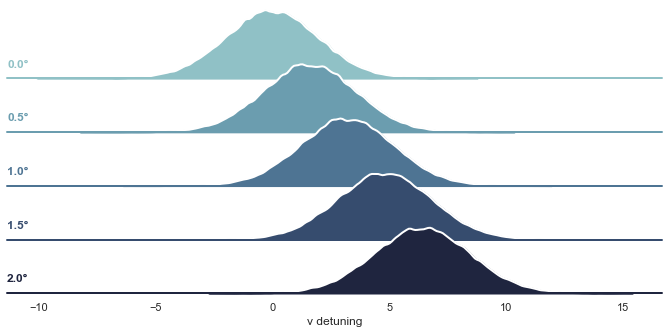

In [12]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(5, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="θ", hue="θ", aspect=10, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "v detuning",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "v detuning", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, f"{label}°", fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "v detuning")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);

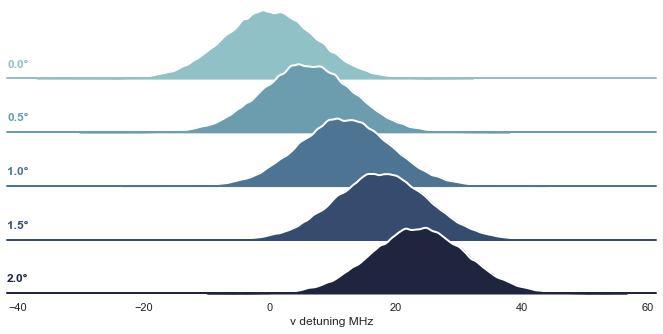

In [13]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(5, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="θ", hue="θ", aspect=10, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "v detuning MHz",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "v detuning MHz", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, f"{label}°", fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "v detuning MHz")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);

If the laser intersects the molecular beam at the same angle for each pass (e.g. a zig-zag perfectly aligned with the molecular beam) the detunings will alternate between positive and negative per pass.

The mirrors are roughly 25" apart, and the windows are 2" wide, e.g. a maximum angle of $4.6^\circ$ if the beam starts at one edge and exits at the other. We can align much better so an angle of $\leq 0.5^\circ$ is realistic. This would mean a central detuning of $\pm 6$ MHz per pass, and a standard deviation that is effectively unchanged from the $0^\circ$ case

## Zig-zag misaligned with the molecular beam
Assume the first pass has an increase angle due to the `mis_alignment` angle

In [14]:
mis_alignment = 0.5

### Even passes

In [15]:
df = pd.DataFrame()
for θ in np.linspace(0, 2, 5):
    v_detuning = np.sin(np.arcsin(vperpendicular/vforward) + np.deg2rad(θ) + np.deg2rad(mis_alignment)) * np.sqrt(vforward**2 + vperpendicular**2)
    df = pd.concat([df, pd.DataFrame({θ: v_detuning})], axis = 1)
display(df.describe().loc[['mean', 'std', '25%', '50%', '75%']])
df = df.apply(lambda x: detuning.velocity_to_detuning(x, f.value, 2*np.pi)) / 1e6
display(df.describe().loc[['mean', 'std', '25%', '50%', '75%']])

,0.0,0.5,1.0,1.5,2.0
mean,1.592680,3.198165,4.803406,6.408281,8.012668
std,1.997209,2.010510,2.033110,2.064697,2.104856
25%,0.261163,1.852524,3.441013,5.019424,6.595499
50%,1.586446,3.193751,4.803986,6.409111,8.015421
75%,2.925707,4.547228,6.173105,7.799895,9.431359


,0.0,0.5,1.0,1.5,2.0
mean,5.861907,11.770941,17.679079,23.585871,29.490866
std,7.350787,7.399744,7.482923,7.599178,7.746984
25%,0.961220,6.818269,12.664753,18.474140,24.274933
50%,5.838964,11.754697,17.681216,23.588926,29.500996
75%,10.768152,16.736210,22.720298,28.707747,34.712400


### Odd Passes

In [16]:
df = pd.DataFrame()
for θ in np.linspace(0, 2, 5):
    v_detuning = np.sin(np.arcsin(vperpendicular/vforward) + np.deg2rad(θ) - np.deg2rad(mis_alignment)) * np.sqrt(vforward**2 + vperpendicular**2)
    df = pd.concat([df, pd.DataFrame({θ: v_detuning})], axis = 1)
display(df.describe().loc[['mean', 'std', '25%', '50%', '75%']])
df = df.apply(lambda x: detuning.velocity_to_detuning(x, f.value, 2*np.pi)) / 1e6
display(df.describe().loc[['mean', 'std', '25%', '50%', '75%']])

,0.0,0.5,1.0,1.5,2.0
mean,-1.618531,-0.012926,1.592680,3.198165,4.803406
std,1.999128,1.993396,1.997209,2.010510,2.033110
25%,-2.954404,-1.342679,0.261163,1.852524,3.441013
50%,-1.622538,-0.017885,1.586446,3.193751,4.803986
75%,-0.277676,1.320708,2.925707,4.547228,6.173105


,0.0,0.5,1.0,1.5,2.0
mean,-5.957051,-0.047574,5.861907,11.770941,17.679079
std,7.357850,7.336755,7.350787,7.399744,7.482923
25%,-10.873771,-4.941769,0.961220,6.818269,12.664753
50%,-5.971798,-0.065826,5.838964,11.754697,17.681216
75%,-1.021996,4.860905,10.768152,16.736210,22.720298


So for a misalignment of the beam with the laser of $0.5^\circ$ and a zig-zag pattern with an angle of $0.5^\circ$ the detuning will be $11.8$ MHz and $0$ MHz, so still a detuning of $\pm 6$ MHz

# Experimental Realization

[CVI Laseroptics](https://www.cvilaseroptics.com/products/mirrors/uncoated-mirror-substrates/rm-uv) sells rectangular mirror substrates, and have UV coatings they can apply.  
[Thorlabs](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=3971) sells rectangular mirror mounts.

Specifically the 50 mm x 30 mm substrates with the `KM100C` mounts should work nicely.
